# Question 5 (MM20B007)

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 2/q5 Rayleigh.csv')

<ipython-input-3-3fac749752ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: title={'center': 'Data Distribution Histogram'}, ylabel='Density'>

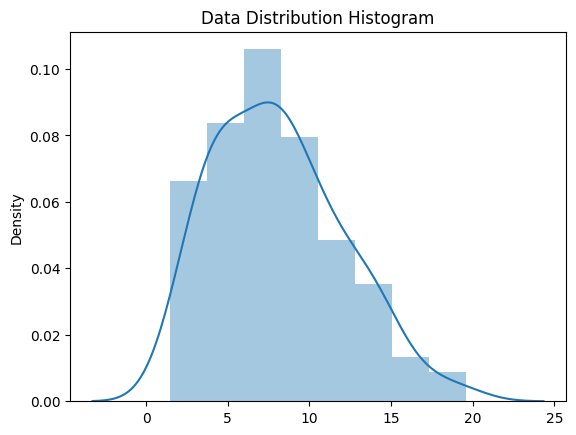

In [3]:
plt.title('Data Distribution Histogram')
sns.distplot(df)

### Parameter estimation using Maximum A Posteriori

To estimate the parameter σ of the Rayleigh distribution, which is given by:

$f(x; \sigma) = \frac{x}{\sigma^2} e^{-\frac{x^2}{2\sigma^2}}, \quad x \geq 0$

we are provided with a normal distributed prior of σ, which is $P(\sigma) \sim \mathcal{N}(\mu = 15, \sigma = 3)$.



In [4]:
# Maximum a Posteriori Estimation for σ in the Rayleigh distribution
def rayleigh_map_likelihood(sigma, data):
    if sigma <= 0:
        return np.inf
    log_likelihood = np.sum(np.log((data / sigma**2) * np.exp(-data**2 / (2 * sigma**2)))) + np.log((np.exp(-((sigma - 15)**2)/18))/(3*(2**0.5)*np.pi))
    return -log_likelihood

result_rayleigh = minimize(rayleigh_map_likelihood, [1.0], args=(df,))
sigma_mle = result_rayleigh.x[0]

print(f"MAP estimate for σ in Rayleigh distribution: {sigma_mle}")

MAP estimate for σ in Rayleigh distribution: 6.461205508911481
